# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:
- Create Jupyter Notebookss (showcasing core skills in Python).
- Create a summary page (via [README.md](README.md)) capturing your findings.
- Share this project via GitHub & LinkedIn.

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I'll be focusing on US Data Analyst roles, but you can adapt to any of the following:



## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [2]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [3]:
dataset = load_dataset('lukebarousse/data_jobs') #dataset from huggingface
df = dataset['train'].to_pandas()

df['job_pposted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_pposted_date
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06-16 13:44:15
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01-14 13:18:07
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10-10 13:14:55
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023-08-07 14:29:36


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  object        
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

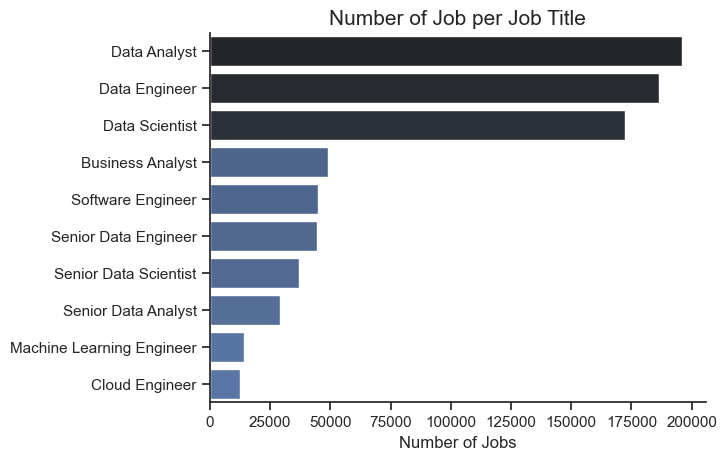

In [6]:
df_vis = df['job_title_short'].value_counts().reset_index()

sns.set_theme(style='ticks')
sns.barplot(data=df_vis,x='count',y= 'job_title_short',hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title("Number of Job per Job Title", fontsize=15)
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()


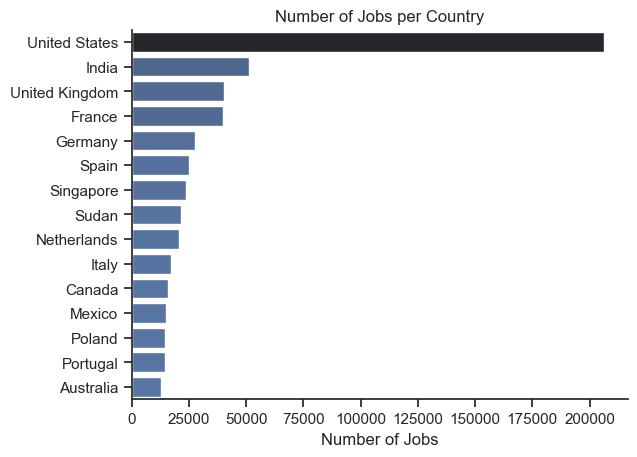

In [7]:
df_vis = df['job_country'].value_counts().to_frame().sort_values(by='count',ascending=False).head(15)

sns.color_palette("rocket")
sns.barplot(data=df_vis,x='count',y='job_country',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title("Number of Jobs per Country")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

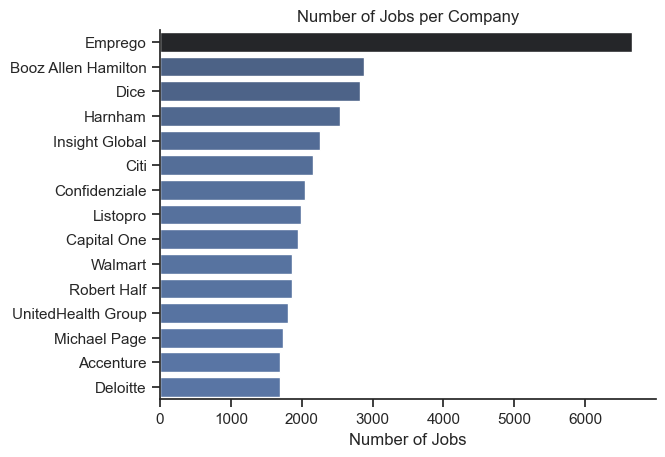

In [8]:
df_vis = df['company_name'].value_counts().reset_index().sort_values('count',ascending=False).head(15)

sns.barplot(x=df_vis['count'],y=df_vis['company_name'],hue=df_vis['count'],palette='dark:b_r',legend=False)
sns.despine()
plt.title("Number of Jobs per Company")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

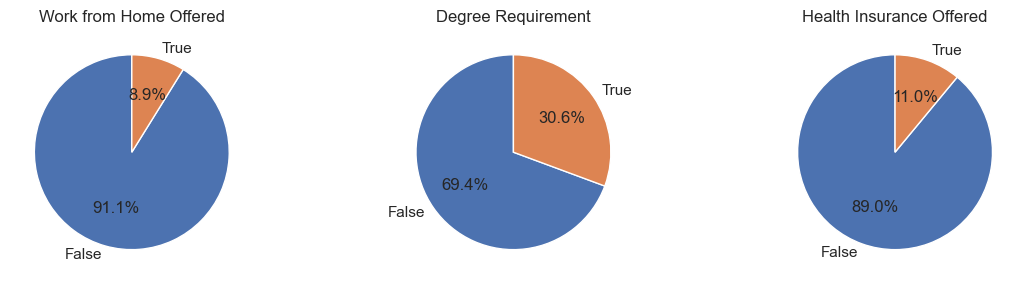

In [9]:
pie_dict = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}


fig, ax = plt.subplots(1,3, figsize=(12, 3))

for i,(key,title) in enumerate(pie_dict.items()):
    ax[i].pie(df[key].value_counts(),labels=['False','True'], autopct="%1.1f%%", startangle=90)
    ax[i].set_title(title)

fig.tight_layout()
plt.show()



## Exploratory Data Analysis for Data Analysts in the US

##### Filter for US Data Analyst roles

In [10]:
df_us_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

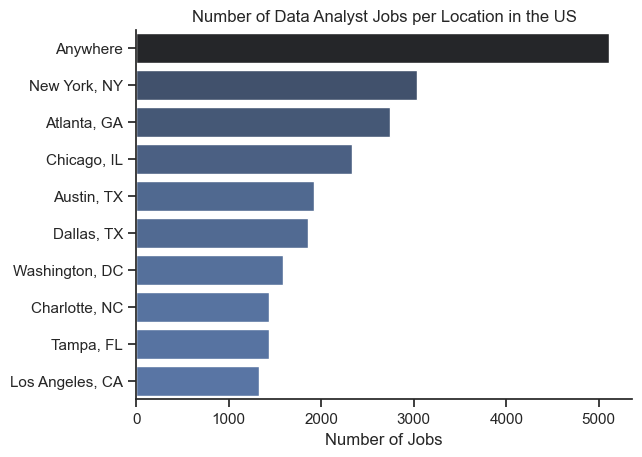

In [11]:
df_vis = df_us_da['job_location'].value_counts().to_frame().sort_values(by='count',ascending=False).head(10)

sns.barplot(data=df_vis, x='count',y='job_location', hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title("Number of Data Analyst Jobs per Location in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

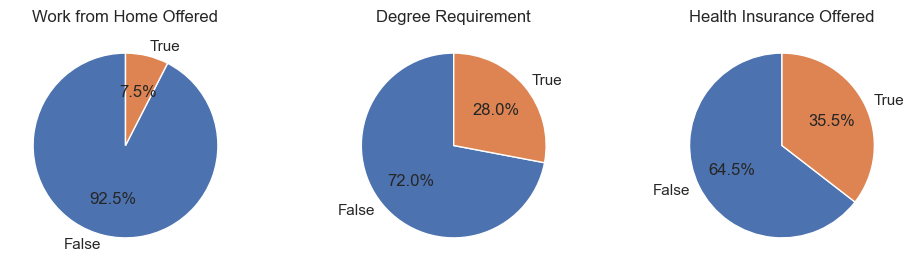

In [12]:

fig, ax = plt.subplots(1,3,figsize=(12,3))


for i, (key,title) in enumerate(pie_dict.items()):
    ax[i].pie(df_us_da[key].value_counts(),labels=['False','True'],autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

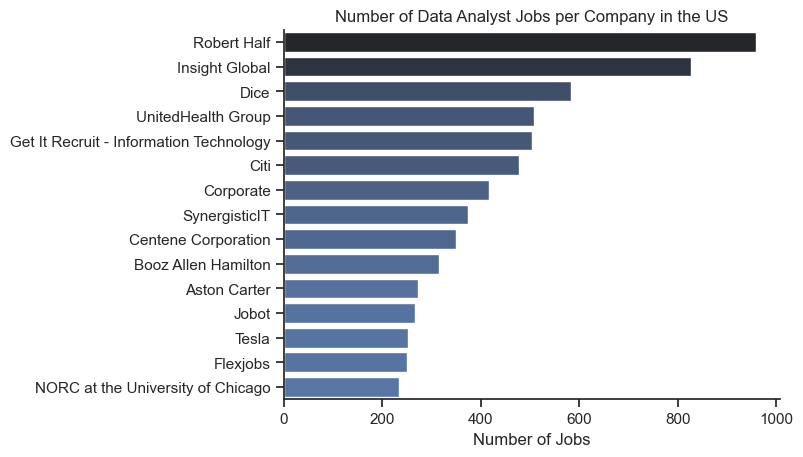

In [14]:
df_vis = df_us_da['company_name'].value_counts().to_frame().head(15)

sns.barplot(data=df_vis,x='count',y='company_name', hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title("Number of Data Analyst Jobs per Company in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()